## 1)Arithmatic Operations

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
def plot_image(title = "", image = None, size = 5):
    # The line below is changed from w, h to h, w
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = w/h
 
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

**1) Addition:**


Syntax: cv2.add(img1, img2)


But adding the pixels is not an ideal situation. So, we use cv2.addweighted(). Remember, both images should be of equal size and depth.

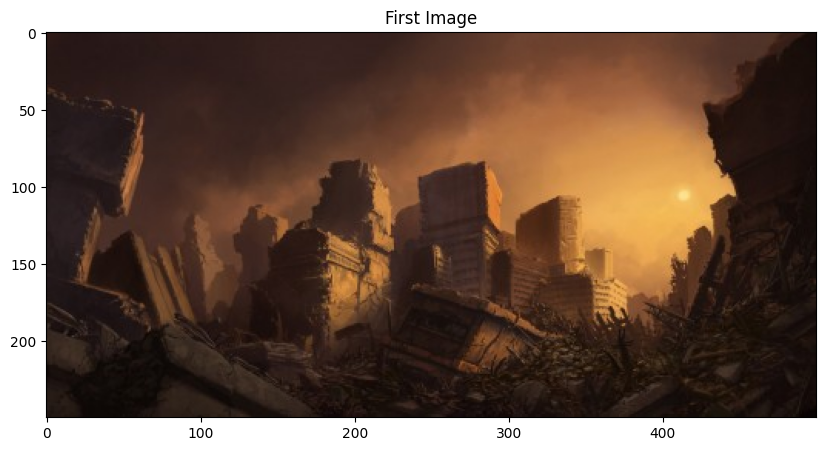

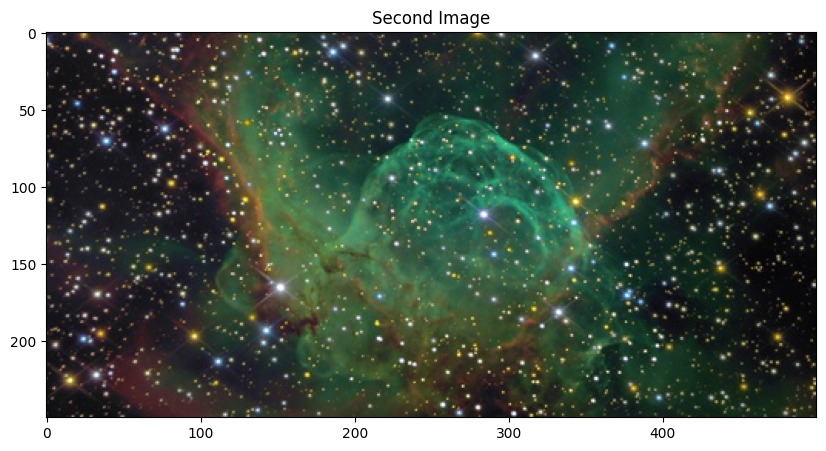

In [3]:
image1 = cv2.imread('images/ocv_image1.jpg')  
image2 = cv2.imread('images/ocv_image2.jpg') 
plot_image("First Image",image1)
plot_image("Second Image",image2)

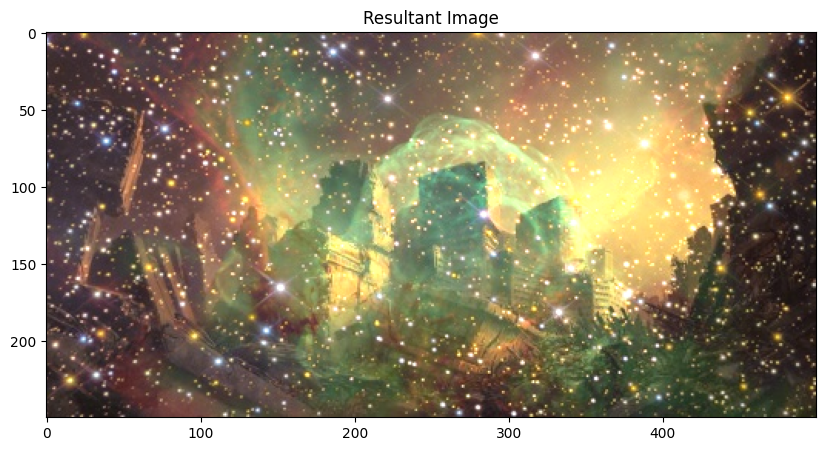

In [60]:
weightedSum = cv2.add(image1,image2)
# weightedSum = image1+image2
plot_image("Resultant Image",weightedSum)

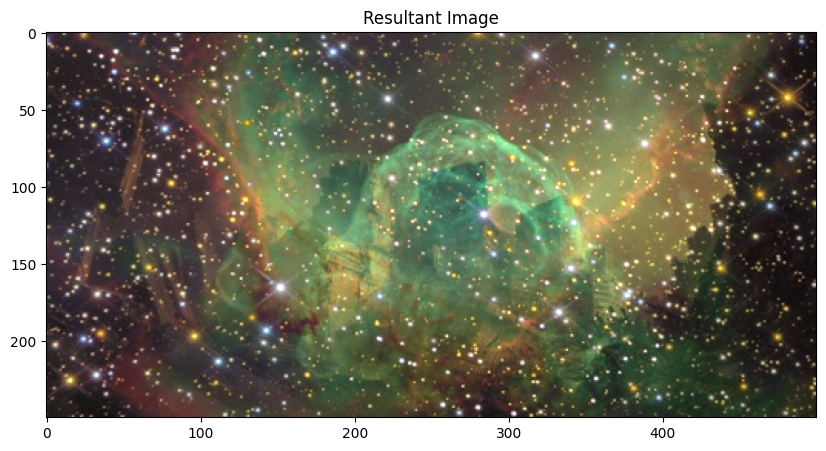

In [5]:
weightedSum = cv2.addWeighted(image1, 0.5, image2, 1, 0) 
plot_image("Resultant Image",weightedSum)

**2) Subtraction of Image:**


Just like addition, we can subtract the pixel values in two images and merge them with the help of cv2.subtract(). The images should be of equal size and depth.

Syntax: cv2.subtract(image1, image2)

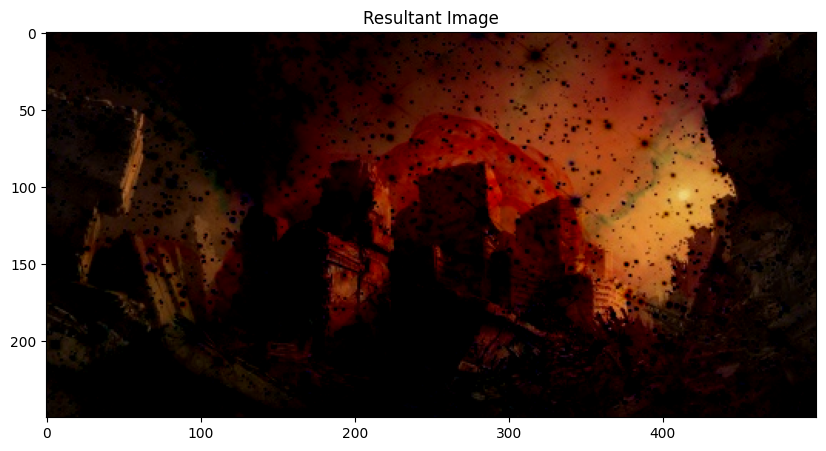

In [6]:
weightedSum = cv2.subtract(image1,image2) 
plot_image("Resultant Image",weightedSum)

**Masking**:

Performing bitwise operations on images has many applications. For example, we can manipulate it and extract its desired part. Moreover, the bitwise AND operation can be used in image masking. Image masking allows us to focus on a specific region in an image. It can be done using the bitwise AND operation. Let’s extract the football from the above football.jpg image.
https://coseries.com/arithmetic-and-bitwise-operations-on-image-in-python-using-opencv/#:~:text=Arithmetic%20and%20Bitwise%20Operations%20on%20Image%20in%20Python,...%208%20Bitwise%20NOT%20Operation%20...%20More%20items

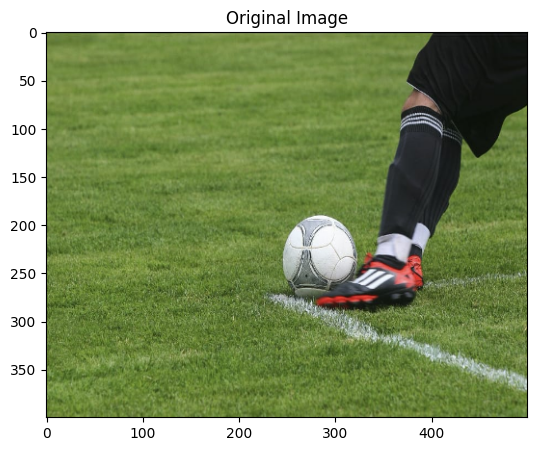

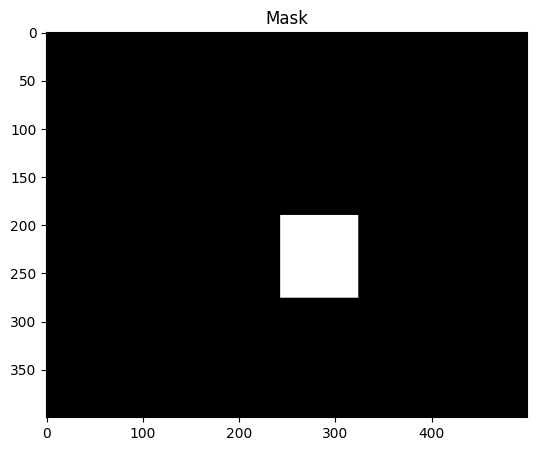

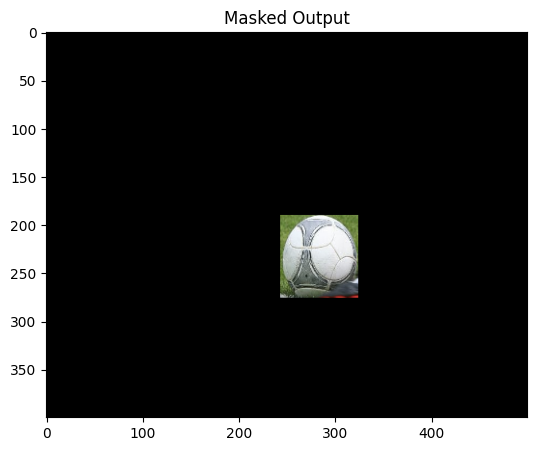

In [7]:
img1 = cv2.imread("images/football.jpg")
img1 = cv2.resize(img1, (500, 400))
plot_image("Original Image",img1)
mask = np.zeros(img1.shape, dtype  = img1.dtype)
mask = cv2.rectangle(mask, (243, 190), (323, 275), (255,255, 255), -1)
plot_image("Mask",mask)
result = cv2.bitwise_and(img1,mask)
plot_image("Masked Output",result)

## 2) **Thresholding, Binarization & Adaptive Thresholding**

1. Binarized Images
2. Thresholding Methods
3. Adaptive Thresholding
4. SkImage's Threshold Local

### **Thresholding Methods** 

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Screenshot%202020-11-17%20at%2012.57.55%20am.png)
![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Screenshot%202020-11-17%20at%2012.58.09%20am.png)

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

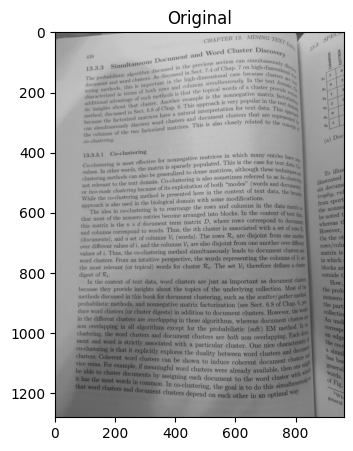

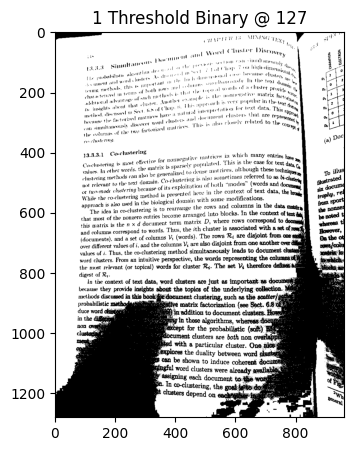

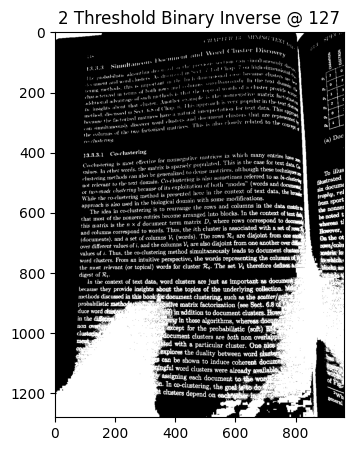

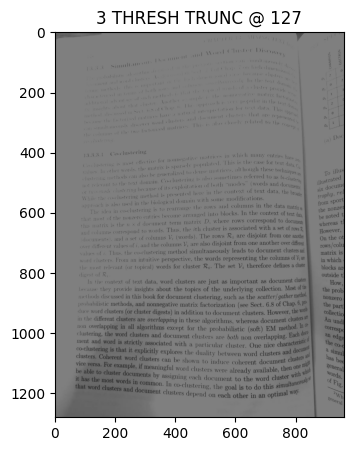

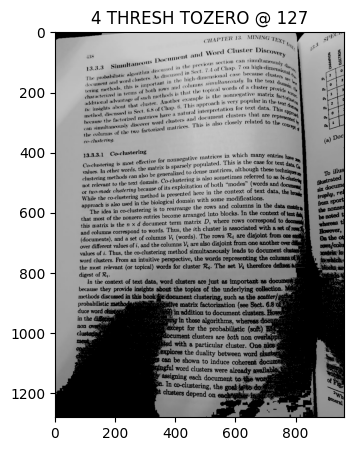

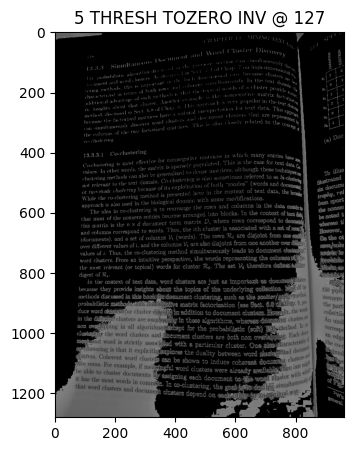

In [8]:
# Load our image as greyscale 
image = cv2.imread('images/scan.jpeg',0)
plot_image("Original", image)

# Values below 127 goes to 0 or black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plot_image('1 Threshold Binary @ 127', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
plot_image('2 Threshold Binary Inverse @ 127', thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
plot_image('3 THRESH TRUNC @ 127', thresh3)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
plot_image('4 THRESH TOZERO @ 127', thresh4)

# Reverse of the above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
plot_image('5 THRESH TOZERO INV @ 127', thresh5)

#### **Adaptive Thresholding**
 In Adaptive thresholding, the threshold value is calculated for smaller regions with different threshold values for different regions with respect to the change in lighting.

1. ADAPTIVE_THRESH_MEAN_C
2. THRESH_OTSU

#### **cv2.adaptiveThreshold Parameters**

``**cv2.adaptiveThreshold**(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst``

- **src** – Source 8-bit single-channel image.
- **dst** – Destination image of the same size and the same type as src .
- **maxValue** – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
- **adaptiveMethod** – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
- **thresholdType** – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
- **blockSize** – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- **C** – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.


**Otsu's Thresholding:**

Otsu’s thresholding technique uses a global threshold value but it is not chosen. It is determined automatically. It works accurately for bimodal images. The bimodal images are those images whose histogram has two peaks. The threshold value is the approximate value of the middle of these two peaks. If the image is not bimodal this thresholding is not accurate.

To apply Otsu’s thresholding, we apply simple thresholding cv2.threshold() with extra flag cv2.THRESH_OTSU. See the syntax given below.

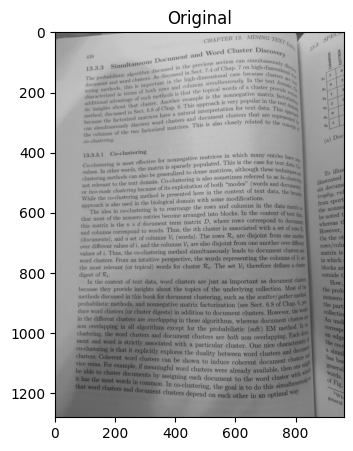

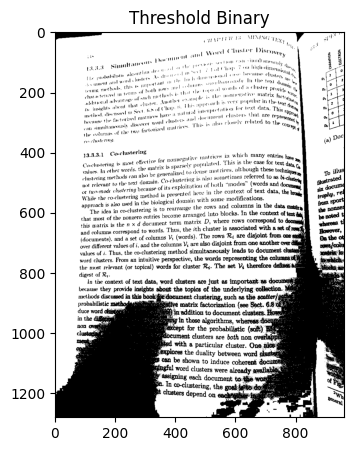

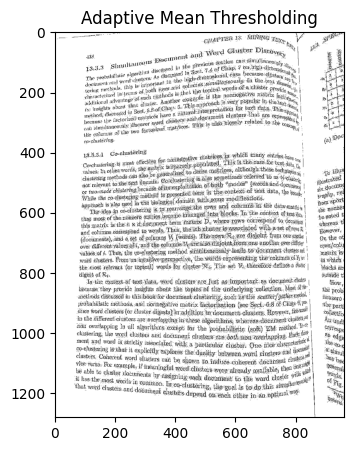

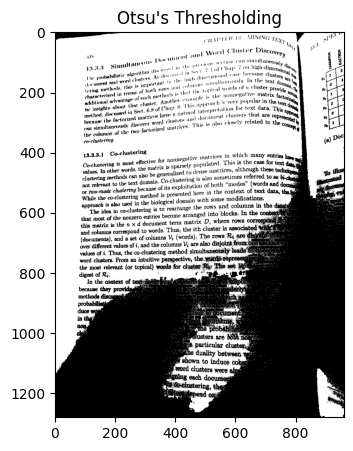

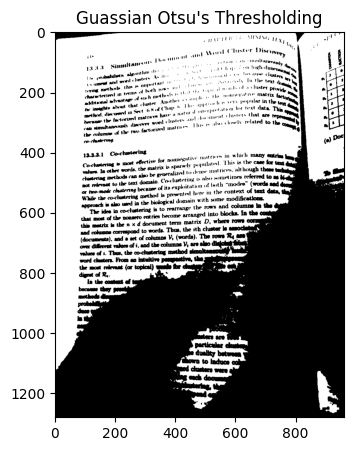

In [9]:
image = cv2.imread('images/scan.jpeg',0)
plot_image("Original", image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plot_image('Threshold Binary', thresh1)

# It's good practice to blur images as it removes noise
#image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
plot_image("Adaptive Mean Thresholding", thresh) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_image("Otsu's Thresholding", th2) 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU)
plot_image("Guassian Otsu's Thresholding", th3) 

## 3) Erosion and Dilation

- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion 

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)

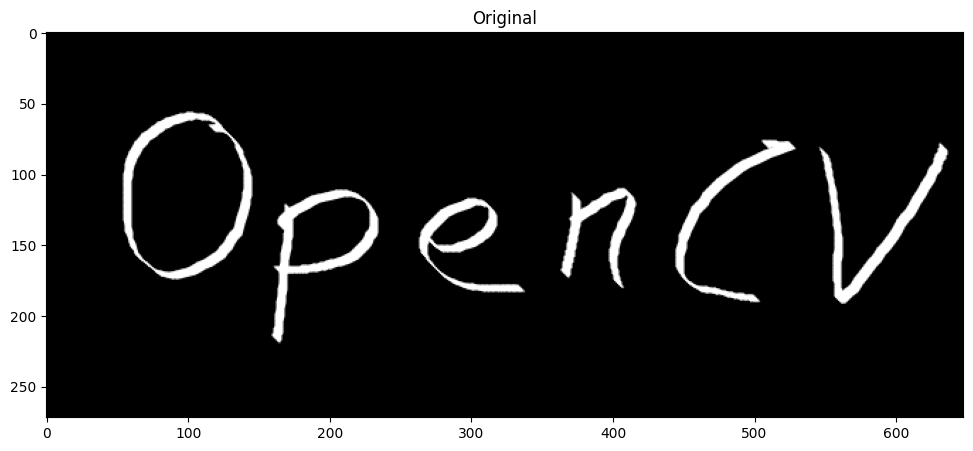

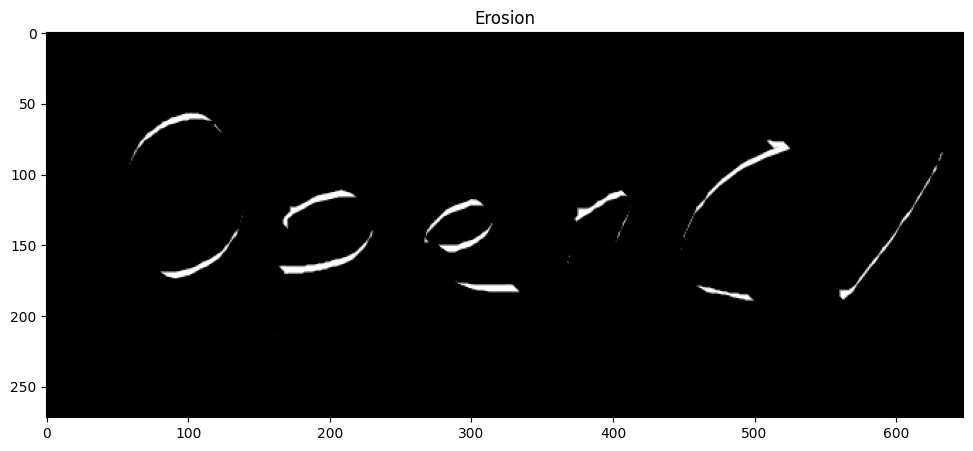

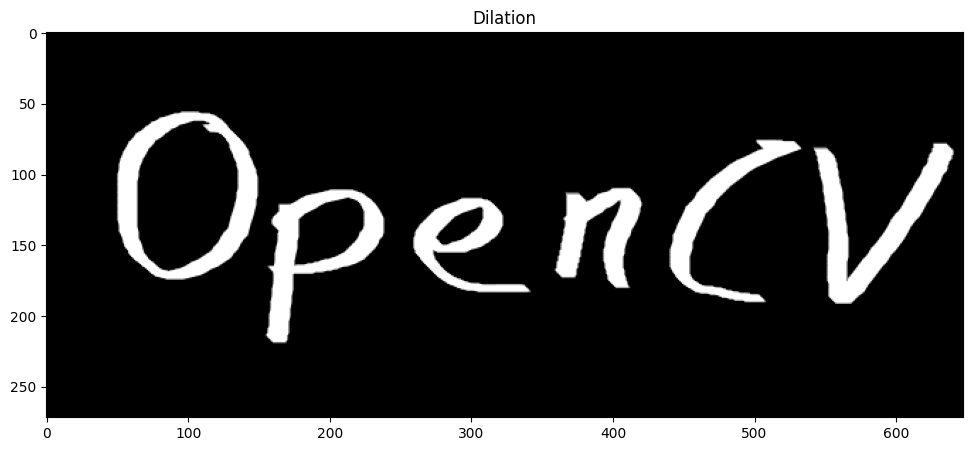

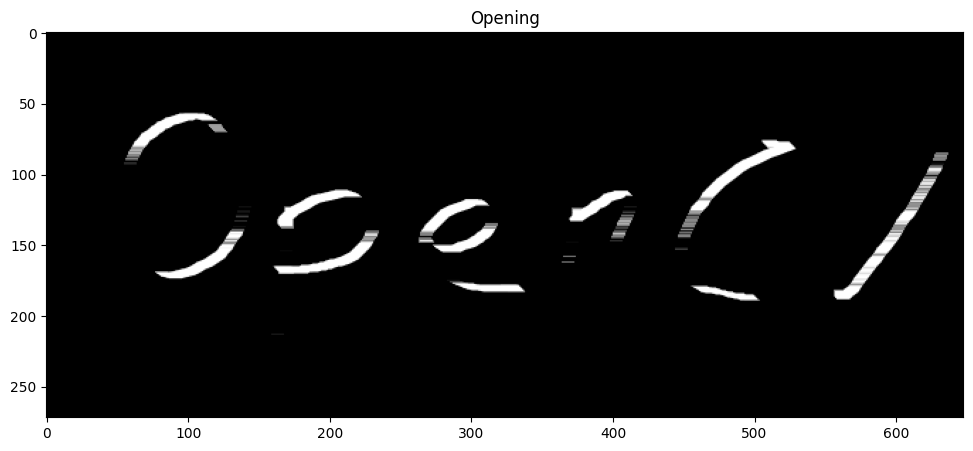

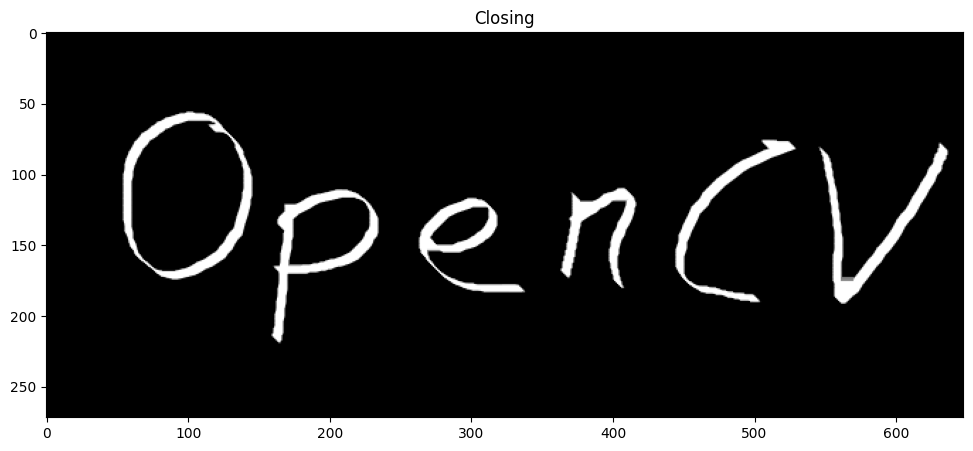

In [56]:
image = cv2.imread('images/opencv_inv.png', 0)
plot_image('Original', image)

# Let's define our kernel size
kernel = np.ones((1,9), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
plot_image('Erosion', erosion)

# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
plot_image('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plot_image('Opening',opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plot_image('Closing',closing)

## 4) Image Denoising

## **Image De-noising - Non-Local Means Denoising**

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

#### Parameters for fastNlMeansDenoisingColored:	

- **src** – Input 8-bit 3-channel image.
- **dst** – Output image with the same size and type as src .
templateWindowSize – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- **searchWindowSize** – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
- **h** – Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
- **hColor** – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

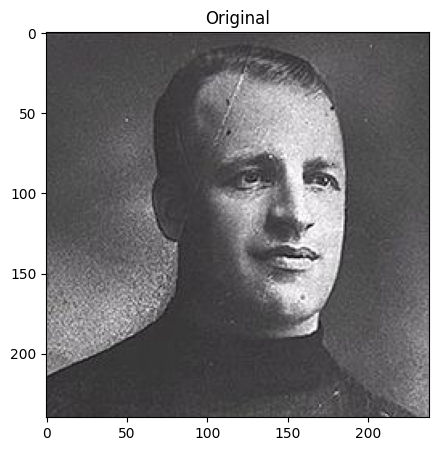

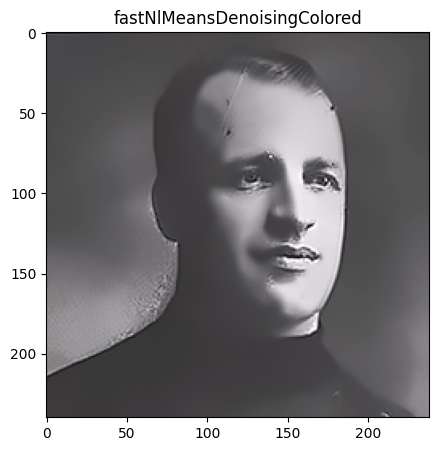

In [11]:
image = cv2.imread('images/EddieGerardHeadshot.jpg')
plot_image('Original', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 11,11,7,21)
plot_image('fastNlMeansDenoisingColored', dst)

## Denoising and Improving Image Quality

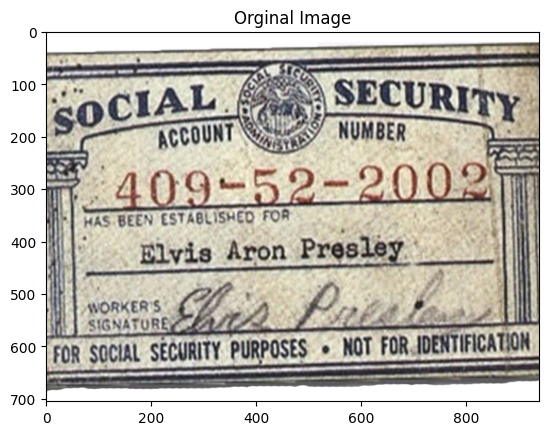

In [44]:
ssn = cv2.imread('images/Elvis-SSN.png')
plt.imshow(cv2.cvtColor(ssn, cv2.COLOR_BGR2RGB), cmap=None)
plt.title("Orginal Image")
plt.show()

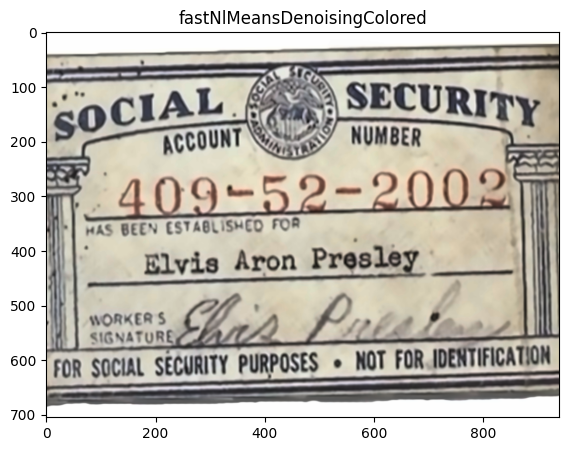

In [45]:
dst = cv2.fastNlMeansDenoisingColored(ssn, None, 11,11,7,21)
plot_image('fastNlMeansDenoisingColored', dst)

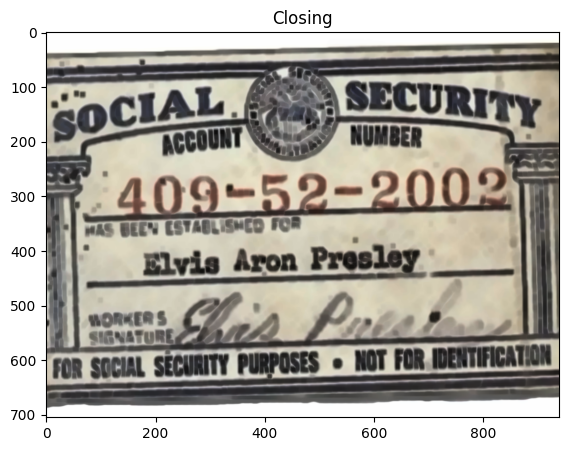

In [46]:
kernel = np.ones((5,5), np.uint8)
dilation = cv2.erode(dst, kernel, iterations = 1)
plot_image('Closing', dilation)

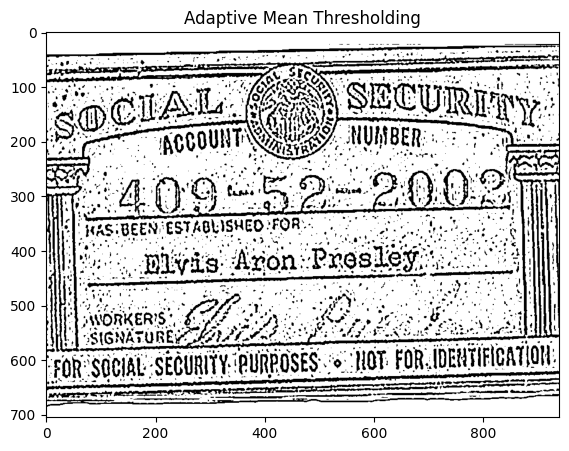

In [47]:
gray_img = cv2.cvtColor(ssn, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 5) 
plot_image("Adaptive Mean Thresholding", thresh)

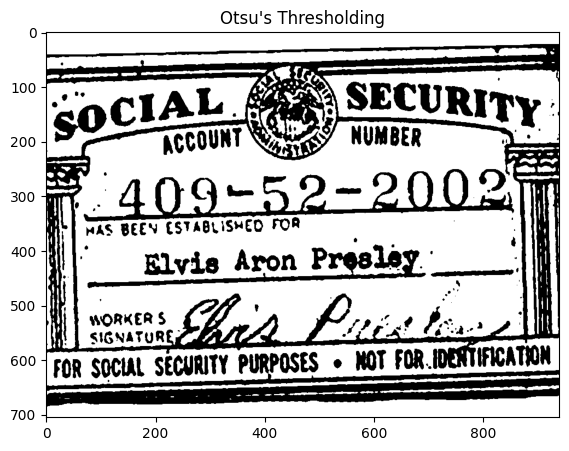

In [48]:
_, th2 = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_image("Otsu's Thresholding", th2)

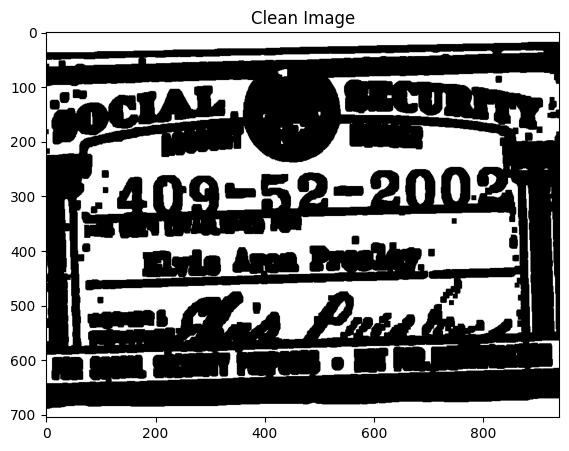

In [61]:
kernel = np.ones((9,9), np.uint8)
final = cv2.erode(th2, kernel, iterations = 1)
plot_image('Clean Image', final)

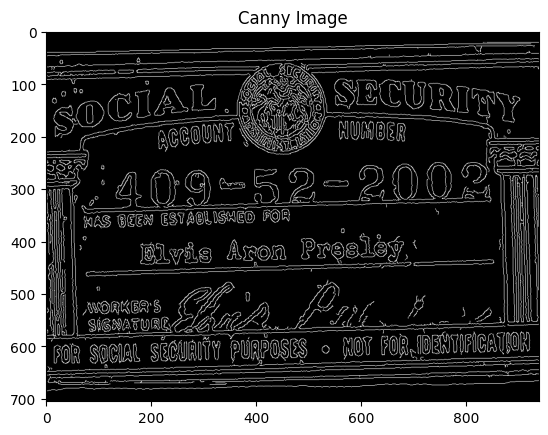

In [53]:
edges_th2_gray = cv2.Canny(image=gray_img, threshold1=100, threshold2=200)
plt.imshow(edges_th2_gray, cmap='gray')
plt.title("Canny Image")
plt.show()

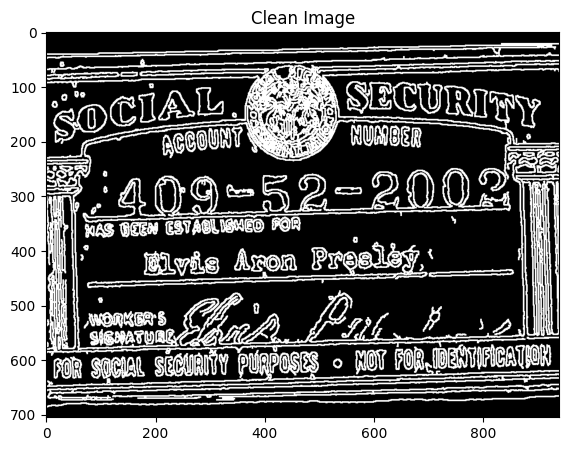

In [55]:
kernel = np.ones((3,3), np.uint8)
final = cv2.dilate(edges_th2_gray, kernel, iterations = 1)
plot_image('Clean Image', final)

## Difference between edge detection and thresholding

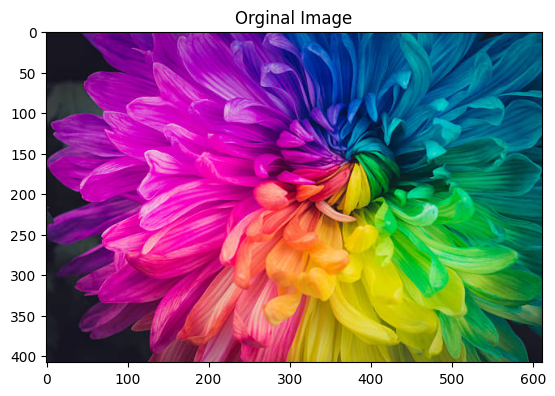

In [38]:
img = cv2.imread('images/colourful_img.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=None)
plt.title("Orginal Image")
plt.show()

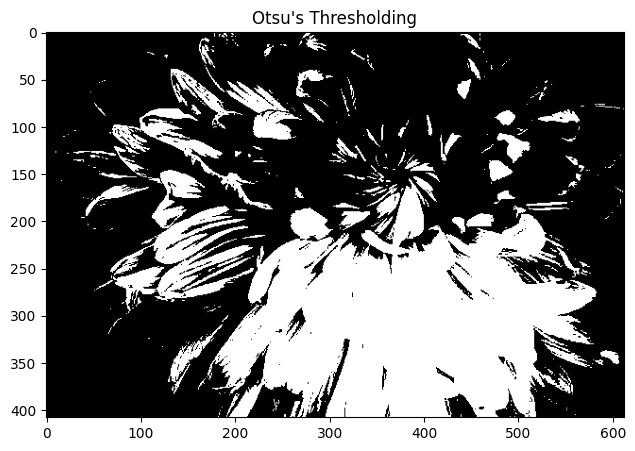

In [39]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th2 = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_image("Otsu's Thresholding", th2)

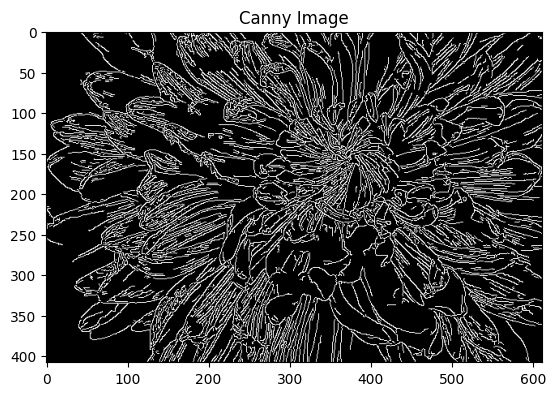

In [42]:
edges_gray = cv2.Canny(image=gray_img, threshold1=50, threshold2=100)
plt.imshow(edges_gray, cmap='gray')
plt.title("Canny Image")
plt.show()